In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dat = pd.read_pickle('allDat.pkl')
dat_de = pd.read_pickle('deDat.pkl')

Fragen:
- Wer kommt wie oft wieder?
- An welchen Produkten sind diese wiederkehrenden Nutzer interessiert? 
- Gibt es Muster, wie z.B. im Sommer nach Schweden, zu Weihnachten nach Dänemark (saisonal).

In [36]:
dat.groupby('E-Mail ').count().sort_values(by='Brand',ascending=False).head(10)

,Kundenname,Kundenname Zeile 2,Adresse,Adresse Zeile 2,Kundennation,PLZ,Stadt,Bundesland,Telefon,Personen,...,Mietpreis,Buchungsdatum,Buchung: direkt/indirekt,Verkaufskanal,Anreise,Abreise,Zahlungsart,time_btw_book_travel_days,Name1,Name2
E-Mail,,,,,,,,,,,,,,,,,,,,,
0000,15988,264,14262,320,15987,15939,14273,15988,15988,15988,...,15988,15988,15988,15988,15988,15988,15988,15988,15988,15988
veranstalter@atraveo.de,7854,3,7786,3,7854,7853,7802,7854,7854,7854,...,7854,7854,7854,7854,7854,7854,7854,7854,7854,7854
kundenservice@atraveo.de,222,27,146,34,222,206,107,222,222,222,...,222,222,222,222,222,222,222,222,222,222
operations@interhome.com,190,2,190,1,190,190,190,190,190,190,...,190,190,190,190,190,190,190,190,190,190
sonja.tenge@reiseland.de,186,25,186,120,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
info@erholungswerk.de,173,0,173,0,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
sandra.vollstaedt@cts-reisen.de,172,0,172,0,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
info@schulfahrt.de,167,13,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
info@wolters.tui.de,153,0,153,0,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153


## Bauunternehmer und Reisebueros finden

In [3]:
# Filter für Bauunternehmer und Reisveranstalter auf
Bauunternehmer_Email_List =['roman.boll@gmx.net','info@ingmont.com', 'estrich', 
                      'construction', 'rkm-industrieservice', 'gebr-nowack.de','heizung','stahlbau',
                      'strabag','spitzke','the-m-group']
Bauunternehmer_Name_List = ['spitzke', 'strabag', 'danmark']

Reiseveranstalter_Email_List = ['sven.kahrs@kkbz.de','sven.kahrs@kkbz.de','atraveo', 
                          'reisen','reisebuero', 'interhome', 'schulfahrt', 'dfb.nl', 'wsmfunsport', 
                          'tours', 'flugboerse','erholung']


emails = dat['E-Mail '].tolist()
names = dat['Kundenname'].tolist()

Bau_emails = []
for email in emails:
    for pat in Bauunternehmer_Email_List:
        if pat in email:
            Bau_emails.append(email)

Bau_names = []
for name in names:
    for pat in Bauunternehmer_Name_List:
        if pat in name:
            Bau_names.append(name)
            
            
Reisever_emails = []
for email in emails:
    for pat in Reiseveranstalter_Email_List:
        if pat in email:
            Reisever_emails.append(email)
            
Bau_emails = unique(Bau_emails)
Reisever_emails = unique(Reisever_emails)
Bau_names = unique(Bau_names)

print(len(Bau_emails))
print(len(Reisever_emails))
print(len(Bau_names))


52
583
31


Es gibt 701 Buchungen, die von Bauunternehmen durchgeführt wurden. Diese werden aus der zukünftigen Analyse ausgeschlossen.

In [55]:
dat_bau = dat.loc[(dat['E-Mail '].isin(Bau_emails))|(dat['Kundenname'].isin(Bau_names))]
dat_wobau = dat.loc[-(dat['E-Mail '].isin(Bau_emails))]
print(dat_bau.shape)
print(dat_wobau.shape)

(701, 34)
(183044, 34)


@guest.booking.com = anonymisierte Adresse von Booking.com -> lassen die sich noch zsammenführen?

'0000' zusammenführen

Stichwort, auf die bei E-Mail gefiltert werden kann, weil Reise gebucht wurde: atraveo, reise, interhome, schulfahrt, dfb.nl, wsmfunsport, tours, flugboerse.de
Bau =  estrich, construction, rkm-industrieservice, gebr-nowack.de


evtl. Bau, weil viele Reisen über das ganze Jahr verteilt: roman.boll@gmx.net (120), info@ingmont.com (62)


Reiseorganisation: sven.kahrs@kkbz.de, u.stenzel@lavb.de

lavb.de = landesanglerverband.de

kkbz.de = Evangelisch - lutherischer Kirchenkreis Bremervörde - Zeven

Gruppenbuchungen mit gleicher Anreise zusammenfassen

Ziel: einduetiges ID finden, dann:

Pivot-Tablle: spalten = ID, COl=Monat/Jahr, einträge Ort

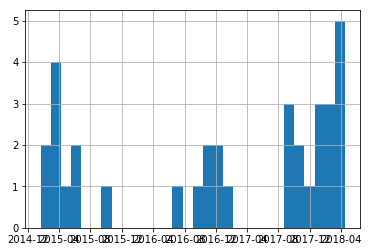

In [33]:
dat_wobau.loc[dat_wobau['Name2']=='pause','Anreise'].hist(bins=30)

In [29]:
dat_wobau.groupby(['Name1','Name2']).size().sort_values(ascending=False)

Name1                      Name2            
evg-luth.                  kirchengemeinde      98
wsm.                       geffken              45
thomas                     schmidt              39
se danmark                 spitzke              37
landes                     anglerverband        36
st.                        bremervörde          32
elbe-elster-anglerverband  e.v                  32
andreas                    pause                32
thomas                     müller               30
clausnitzer                wirtschaftskontor    29
mario                      siedow               29
spitzke                    danmark              28
firma                      danmark              28
andreas                    müller               27
martin                     schmidt              25
michael                    schmidt              25
heimstaette                jeddingen            24
anncathrin                 uekermann            24
peter                      schmidt   